In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import num2date

In [3]:
path = '/Users/johannemehren/Desktop/filer/'
ds_obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')

ds_era5 = xr.open_dataset(path + 'FULL-ERA5.monthmean.2007-2018.concat_new.nc')
ds_erai = xr.open_dataset(path + 'era5_latlon_2006-2018_3030.nc')

ds_era5_regrid = xr.open_dataset(path + 'gridfile_test.nc')
ds_erai_regrid = xr.open_dataset(path + 'erai_regrid_5x5.nc')

In [7]:
era5_sl = ds_era5.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
erai_sl = ds_erai.sel(lat=slice(20,-20), time=slice('2007-01-01', '2018-12-31'))

era5_sl_regrid = ds_era5_regrid.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
erai_sl_regrid = ds_erai_regrid.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))

obs_sl = ds_obs.resample(time='M').mean()
obs_l = obs_sl.sel(lat=slice(-20,20))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

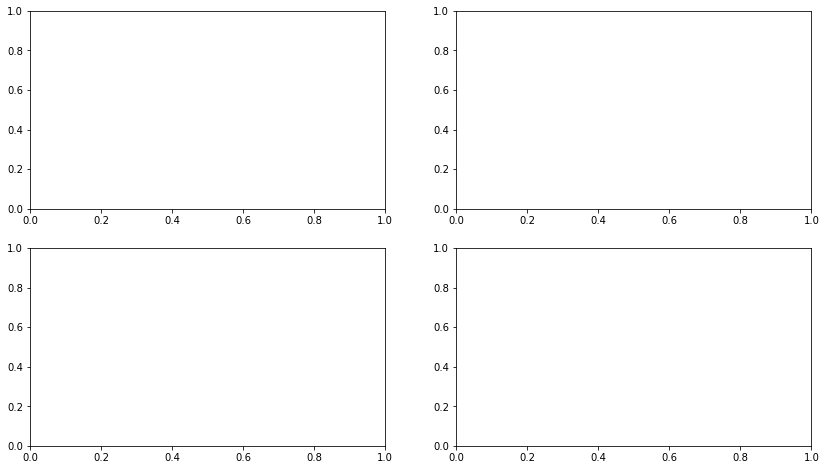

In [14]:
fig, axs = plt.subplots(2,2,figsize=(14,8))

era5_sl.ctpt.mean(axis=(0,2)).plot(ax=axs[0])

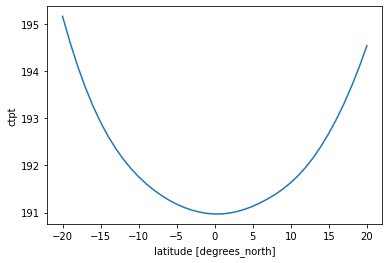

In [12]:
era5_sl.ctpt.mean(axis=(0,2)).plot()

In [65]:
e5_obs_ctpt= era5_sl.ctpt[:,:].mean(axis=0) - obs_sl.CP_T[:,:].mean(axis=(0))
ei_obs_ctpt = erai_sl.ctpt[:,:].mean(axis=0) - obs_sl.CP_T[:,:].mean(axis=(0))

(-0.2, 2)

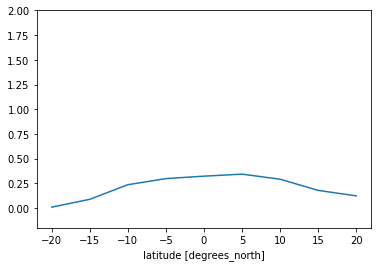

In [66]:
e5_obs_ctpt.plot()
#ei_obs_ctpt.plot()
plt.ylim(-0.2,2)